# Gradient Descent 

Fit a regression line using gradient descent to minimise the squared error loss function.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

x = np.array([18, 20, 30, 33, 33, 35, 40, 45, 49, 55, 57, 58])
y = np.array([15, 25, 31, 35, 33, 42, 50, 55, 62, 63, 64, 65])

## Step 0: Setup

### Add data to dataframe

In [2]:

df = pd.DataFrame(data={"x":x,"y":y})
df.head()

,x,y
0,18,15
1,20,25
2,30,31
3,33,35
4,33,33


### plot data

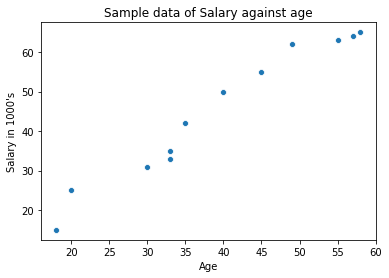

In [3]:
sns.scatterplot(x, y)
plt.xlabel("Age")
plt.ylabel("Salary in 1000's")
plt.title("Sample data of Salary against age")
plt.show()

## Step 1: Initialise parameters

Normally parameters are randomly initialised. To make the gradient descent process deterministic for all users, I'm going to hardcode variables here.

In [4]:
a = 1
c = -2

### plot line

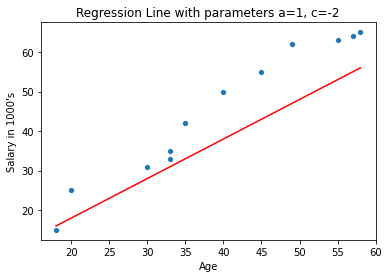

In [5]:
plt.plot(x, a*x + c, color='r')
sns.scatterplot(x, y)
plt.xlabel("Age")
plt.ylabel("Salary in 1000's")
plt.title("Regression Line with parameters a=1, c=-2")
plt.show()

## Step 2: Calculate the error

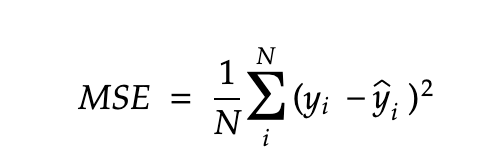

In [6]:
def predict(x, a, c):
    return a*x + c

def calc_squared_error(y, y_hat):
    return np.power(y - yhat, 2)

def calc_mean_squared_error(y, y_hat):
    return np.mean(calc_squared_error(y, y_hat))


In [7]:
yhat = predict(x, a, c)
error = calc_squared_error(y, yhat)

In [8]:
df['yhat'] = yhat
df['error'] = error
df.head()

,x,y,yhat,error
0,18,15,16,1
1,20,25,18,49
2,30,31,28,9
3,33,35,31,16
4,33,33,31,4


### calculate MSE across all training examples

In [9]:
print(f"Our MSE is: { df['error'].mean():.3f}")

Our MSE is: 77.917


## Step 3 - Calculate gradient

In [10]:
def calc_gradient_analytical(a, c, x, y):
    dfda = -2*x* (y - (a*x +c))
    dfdc = -2*(y - (a*x +c))
    return dfda, dfdc

dfda, dfdc = calc_gradient_analytical(a, c, x, y)

In [11]:
df['dfda'] = dfda
df['dfdc'] = dfdc
df.head()

,x,y,yhat,error,dfda,dfdc
0,18,15,16,1,36,2
1,20,25,18,49,-280,-14
2,30,31,28,9,-180,-6
3,33,35,31,16,-264,-8
4,33,33,31,4,-132,-4


In [12]:
np.mean(dfda)

-677.5

In [13]:
np.mean(dfdc)

-15.166666666666666

In [14]:
a-(0.0005* -677.5)

1.33875

## Step 4: Update parameters

In [16]:
def update_parameters(a, c, dfda, dfdc, lmbda):
    a_new = a - (lmbda * np.mean(dfda))
    c_new = c - (lmbda * np.mean(dfdc))
    return a_new, c_new
    
LAMBDA = 0.1    
new_parameters = update_parameters(a, c, dfda, dfdc, LAMBDA)
new_parameters

(68.75, -0.4833333333333334)

## Step 5: Repeat steps 2 to 4.

In [17]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(x.reshape(-1, 1))
y_scaler = StandardScaler().fit(y.reshape(-1, 1))

x_scaled = x_scaler.transform(x.reshape(-1, 1))
y_scaled = y_scaler.transform(y.reshape(-1, 1))

In [48]:
def is_early_break_condition(i, errors_by_iteration):
    return i > 5 and abs(errors_by_iteration[-1] - errors_by_iteration[-2]) < 0.000001
    
def is_divergence(i, errors_by_iteration):
    return i > 3 and ( 
        errors_by_iteration[i-2] - errors_by_iteration[i-1] < 0 and
        errors_by_iteration[i-1] - errors_by_iteration[i] < 0)
    
    
number_iterations = 50000
errors_by_iteration = np.array([])

LAMBDA = 0.1
a = 1
c = -2
max_iters = 20 
for i in range(0, number_iterations):
    yhat = predict(x_scaled, a, c)
    mse = calc_mean_squared_error(y, yhat)

    dfda, dfdc = calc_gradient_analytical(a, c, x_scaled, y_scaled)
    new_parameters = update_parameters(a, c, dfda, dfdc, LAMBDA)

    errors_by_iteration = np.append(errors_by_iteration, mse)
    print(f"iteration {i} :a={a:.5f}, c={c:.5f}, error={mse:.5f}")
    a, c = new_parameters    
    if is_early_break_condition(i, errors_by_iteration):
        break
    if is_divergence(i, errors_by_iteration):
        print("Possible divergence detected")
        break

iteration 0 :a=1.00000, c=-2.00000, error=2480.66667
iteration 1 :a=0.99585, c=-1.60000, error=2443.21839
iteration 2 :a=0.99254, c=-1.28000, error=2413.49020
iteration 3 :a=0.98988, c=-1.02400, error=2389.85511
iteration 4 :a=0.98776, c=-0.81920, error=2371.04143
iteration 5 :a=0.98606, c=-0.65536, error=2356.05089
iteration 6 :a=0.98471, c=-0.52429, error=2344.09711
iteration 7 :a=0.98362, c=-0.41943, error=2334.55883
iteration 8 :a=0.98275, c=-0.33554, error=2326.94404
iteration 9 :a=0.98205, c=-0.26844, error=2320.86235
iteration 10 :a=0.98150, c=-0.21475, error=2316.00347
iteration 11 :a=0.98105, c=-0.17180, error=2312.12053
iteration 12 :a=0.98070, c=-0.13744, error=2309.01683
iteration 13 :a=0.98041, c=-0.10995, error=2306.53557
iteration 14 :a=0.98018, c=-0.08796, error=2304.55165
iteration 15 :a=0.98000, c=-0.07037, error=2302.96521
iteration 16 :a=0.97986, c=-0.05629, error=2301.69650
iteration 17 :a=0.97974, c=-0.04504, error=2300.68182
iteration 18 :a=0.97965, c=-0.03603, e

### plot errors

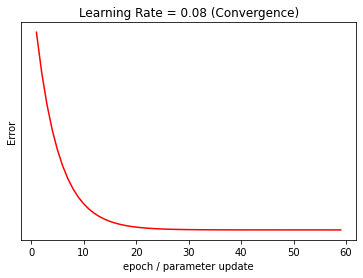

In [52]:
start = 1
end = 60
x_to_plot = np.arange(0, errors_by_iteration.size)[start:end]
y_to_plot = errors_by_iteration[start:end]
plt.plot(x_to_plot,y_to_plot , color='r')
plt.xlabel("epoch / parameter update")
plt.ylabel("Error")
plt.yticks([])
plt.title(f"Learning Rate = 0.08 (Convergence)")

#x_ticks = [i-1 for i in range(start, end) if i%2]
#plt.xticks(x_ticks)
plt.show()

### plot regression line 

In [ ]:
plt.plot(x, a*x + c, color='r')
sns.scatterplot(x, y)
plt.xlabel("Age")
plt.ylabel("Salary in 1000's")
plt.title(f"Regression line: MSE={errors_by_iteration[-1]:.3f}")
plt.show()